In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings

warnings.filterwarnings("ignore")



for dirname,_,filenames in os.walk("C:/cv/xray/Curated X-Ray Dataset"):
    for filename in filenames:
        print(os.path.join(dirname,filename))




data_dir = "C:/cv/xray/Curated X-Ray Dataset"

print(os.listdir(data_dir))


labels = ['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral']


C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (10).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (100).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1000).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1001).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1002).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1003).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1004).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1005).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1006).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1007).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1008).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1009).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (101).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1010).jpg
C:/cv/xray/Curated X-Ray Dataset\COVID-19\COVID-19 (1011).jpg
C:/cv/xray/Cura

In [5]:

image_size = 150



data = []

for i in labels:
    path = os.path.join(data_dir,i)
    for j in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path,j),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img, (image_size,image_size))
        data.append([img_array,i])



X = []
y = []

for features,labels in data:
    X.append(features)
    y.append(labels)




le = LabelEncoder()


y = le.fit_transform(y)





X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


X_train = np.array(X_train,dtype='float32') / 255.0
X_test = np.array(X_test,dtype='float32') / 255.0

y_train = np.array(y_train,dtype='int64')
y_test = np.array(y_test,dtype='int64')

X_train = X_train.reshape((-1,image_size,image_size,1))
X_test = X_test.reshape((-1,image_size,image_size,1))
X_train.shape,X_test.shape


y_train = to_categorical(y_train,num_classes=4)
y_test = to_categorical(y_test,num_classes=4)







100%|█████████████████████████████████████████████████████████████████████████████| 1656/1656 [00:06<00:00, 271.34it/s]


In [6]:
CNN = Sequential()
CNN.add(Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(150,150,1)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=64,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128,activation='relu',kernel_size=(3,3)))
CNN.add(BatchNormalization())
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Flatten())

CNN.add(Dense(512,activation='relu'))
CNN.add(Dense(4,activation='softmax'))
CNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = CNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
loss,acc = CNN.evaluate(X_test,y_test)
pred = CNN.predict(X_test)
loss,acc = CNN.evaluate(X_test,y_test)
print(f'testing loss: {loss*100:.2f}%')
print(f'testing accuracy: {acc*100:.2f}%')




Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 78s 412ms/step - accuracy: 0.6633 - loss: 7.8370 - val_accuracy: 0.1777 - val_loss: 26.7973
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 75s 408ms/step - accuracy: 0.8236 - loss: 0.4453 - val_accuracy: 0.3060 - val_loss: 4.0404
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 75s 406ms/step - accuracy: 0.8425 - loss: 0.3816 - val_accuracy: 0.6052 - val_loss: 1.3552
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 99s 533ms/step - accuracy: 0.8761 - loss: 0.3056 - val_accuracy: 0.8406 - val_loss: 0.3761
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 145s 783ms/step - accuracy: 0.8628 - loss: 0.3113 - val_accuracy: 0.8501 - val_loss: 0.3626
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 207s 808ms/step - accuracy: 0.8801 - loss: 0.2809 - val_accuracy: 0.8535 - val_loss: 0.3455
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 149s 807ms/step - accuracy: 0.9007 - loss: 0.2361 - val_accuracy: 0.8236 - val_loss: 0.9201
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 148s 802ms/step - accuracy: 0.8881 - lo

Accuracy score: 75.95%
classification report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91       266
           1       0.94      0.96      0.95       646
           2       0.85      0.41      0.55       588
           3       0.46      0.82      0.59       342

    accuracy                           0.76      1842
   macro avg       0.78      0.79      0.75      1842
weighted avg       0.81      0.76      0.75      1842
%


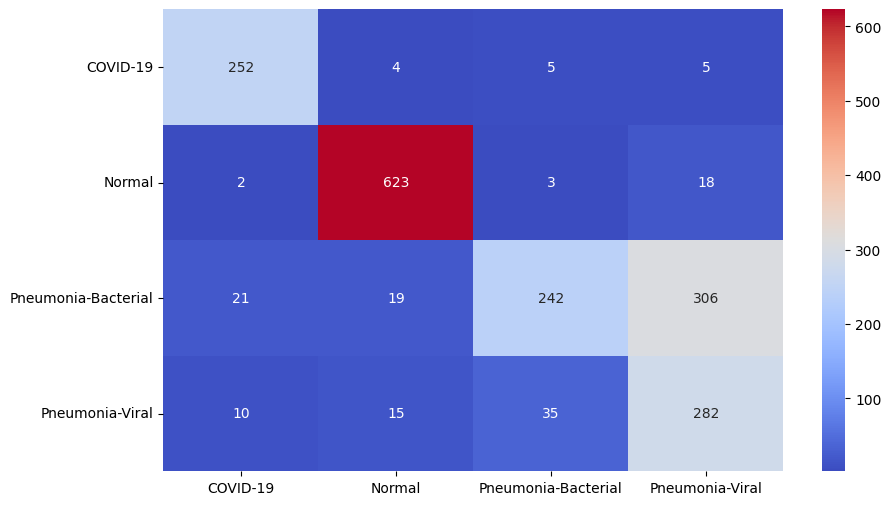

In [7]:

y_pred = np.argmax(pred,axis= -1)
y_test = np.argmax(y_test,axis= -1)



acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {acc*100:.2f}%')


clf_rpt = classification_report(y_test, y_pred)
print(f'classification report: {clf_rpt}%')


cm= confusion_matrix(y_test,y_pred)

def plot_confusion_matrix(y_test,y_pred):
    return sns.heatmap(cm,fmt='d',cmap='coolwarm',annot=True,xticklabels=['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral'],yticklabels=['COVID-19', 'Normal', 'Pneumonia-Bacterial', 'Pneumonia-Viral'])


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test, y_pred)
plt.show()